In [30]:
from init_nb import init_notebook
config = init_notebook()

from pathlib import Path

In [32]:
from scipy.io import loadmat
import pandas as pd
matpath = Path("/homes_unix/jlegrand/data/Memento/output/connectivity/atlas-GINNA_no-gsr_matlab")

matrices = loadmat(matpath /"control.mat")["matrices"]
df = pd.read_csv(matpath / "balanced_control.csv", index_col=0)

In [33]:
matrices.shape

(2536, 33, 33)

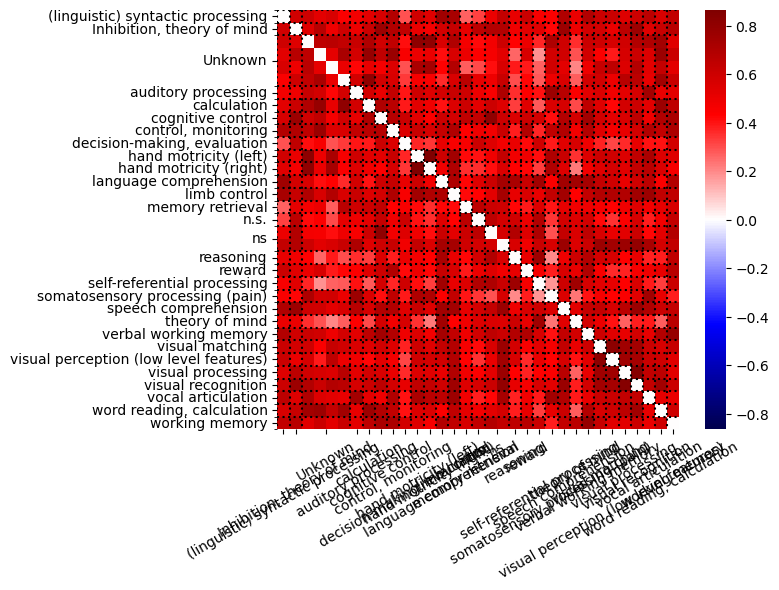

In [35]:
from bold_dementia.connectivity import plot_matrix, Atlas, plot_ordered_matrix
import matplotlib.pyplot as plt
atlas = Atlas.from_name("GINNA", False)
plot_matrix(matrices[4], atlas)
plt.show()

In [37]:
ts = loadmat(matpath /"control_series_ub.mat")["matrices"][0]
ts.shape

(2536,)

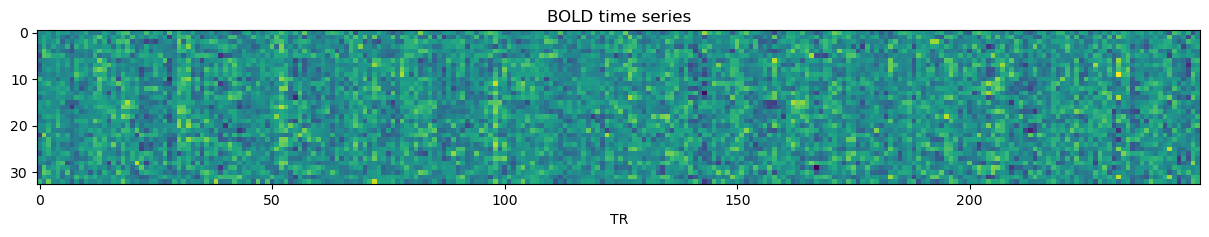

In [44]:
plt.subplots(figsize=(15, 4))
plt.imshow(ts[200][:, :].T)
plt.xlabel("TR")
plt.title("BOLD time series")
plt.show()

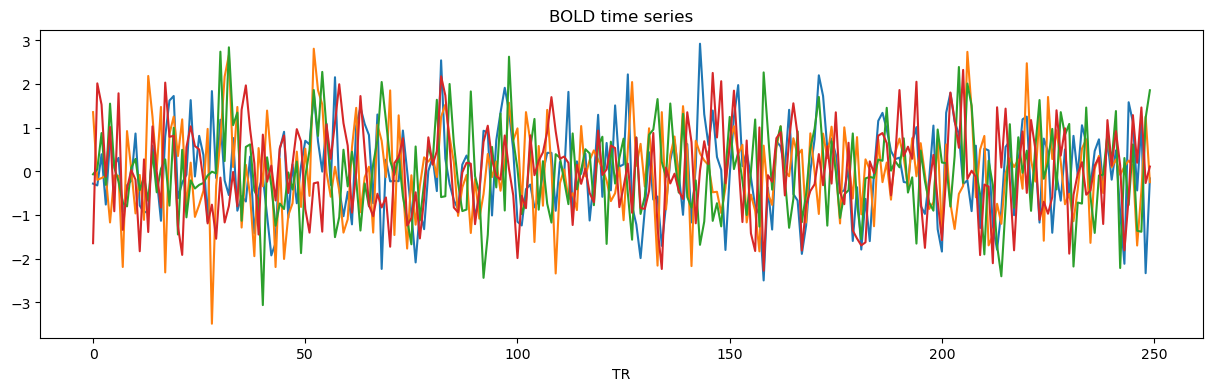

In [42]:
plt.subplots(figsize=(15, 4))
plt.plot(ts[200][:, ::10])
plt.xlabel("TR")
plt.title("BOLD time series")
plt.show()